In [24]:
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [25]:
#get data
df = web.DataReader('AAPL', data_source='yahoo',start='2012-01-01',end='2019-12-19')
#show data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.691425
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.759631
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.901293
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.036158
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,13.015480
...,...,...,...,...,...,...
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,68.316193
2019-12-16,70.197502,69.245003,69.250000,69.964996,128186000.0,69.485619
2019-12-17,70.442497,69.699997,69.892502,70.102501,114158400.0,69.622192


In [26]:
df.shape

(2005, 6)

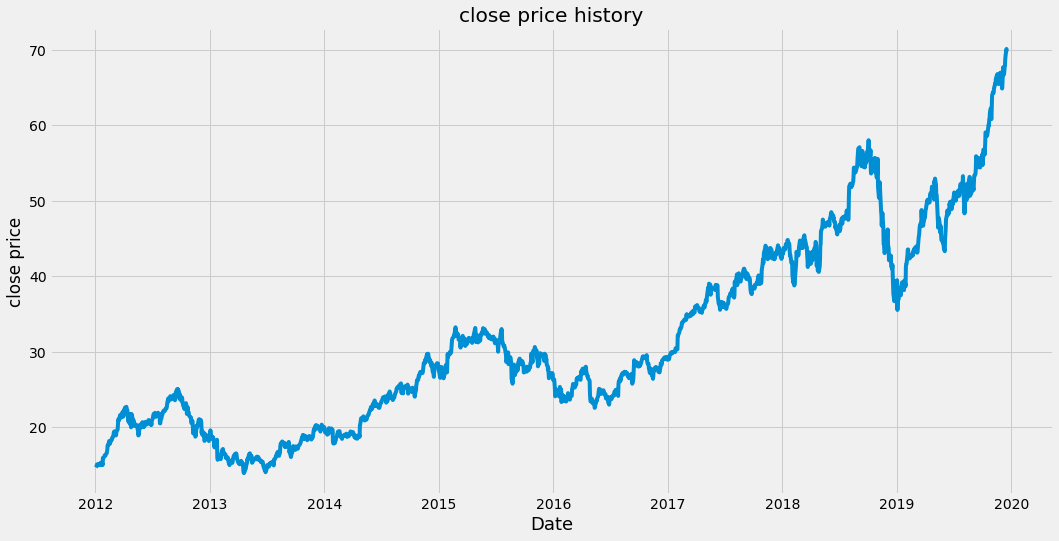

In [27]:
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price')
plt.plot(df['Close'])
plt.show()

In [28]:
import math
#create a dataframe with only 'close' column
data =df[['Close']]
#convert dataframe into numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1604

In [29]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [1.        ],
       [0.99701712],
       [0.99826367]])

In [30]:
#create the training data set
#create the scaled training dataset
train_data = scaled_data[0:training_data_len,:]
#split the data into X_train and y_train data sets
X_train = []
y_train = []

for i in range(60,len(train_data)):
  X_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(X_train)
    print(y_train)
    print()

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [34]:
len(X_train)

1544

In [45]:
#convert the X_train, y_train to numpy arrays
X_train,y_train = np.array(X_train),np.array(y_train)   #lists to arrays

In [46]:
X_train.shape

(1544, 60, 1)

In [49]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) 
X_train.shape

(1544, 60, 1)

In [48]:
X_train.shape

(1544, 60, 1)

In [50]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [53]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [54]:
#train the model
model.fit(X_train,y_train,batch_size=1,epochs=1)    #for every training sample forward and backward pass ocuurs and loss got calculated and weights are updated.This is Stochastic GD

1544/1544 [==============================] - 38s 24ms/step - loss: 6.7452e-04


In [55]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2005
test_data = scaled_data[training_data_len-60:,:]
#create the data sets X_test and y_test
X_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  X_test.append(test_data[i-60:i,0])

In [56]:
#create the data into numpy array
X_test = np.array(X_test)

In [57]:
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [58]:
#prediction
predictions = model.predict(X_test)
Unscaled_predictions = scaler.inverse_transform(predictions)

In [59]:
y_test

array([[46.57749939],
       [46.90750122],
       [46.79000092],
       [47.09000015],
       [47.03749847],
       [47.14500046],
       [46.97499847],
       [46.875     ],
       [46.71749878],
       [47.56000137],
       [47.95750046],
       [48.32749939],
       [48.49499893],
       [48.36500168],
       [47.92499924],
       [47.80749893],
       [48.06999969],
       [47.67499924],
       [47.70000076],
       [47.20999908],
       [47.18500137],
       [46.42250061],
       [46.625     ],
       [46.36500168],
       [46.22999954],
       [45.54249954],
       [46.10749817],
       [46.04000092],
       [46.375     ],
       [46.27750015],
       [46.79499817],
       [45.97999954],
       [46.34999847],
       [46.99250031],
       [47.64500046],
       [47.58750153],
       [46.97000122],
       [47.75749969],
       [47.83250046],
       [47.72750092],
       [47.86249924],
       [47.59999847],
       [47.97000122],
       [47.86000061],
       [47.90250015],
       [48

In [60]:
#getiing RMSE
rmse = np.sqrt(np.mean(Unscaled_predictions - y_test)**2)  #should be very less
rmse

0.8763700470960051

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


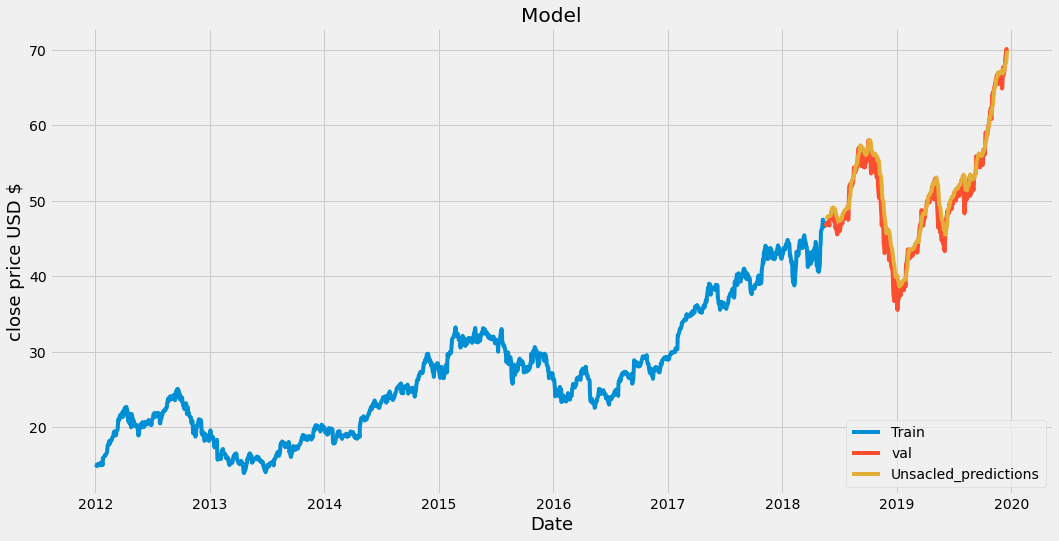

In [61]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Unscaled_predictions'] = Unscaled_predictions
#visualize data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price USD $',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Unscaled_predictions']])
plt.legend(['Train','val','Unsacled_predictions'],loc = 'lower right')
plt.show()


In [62]:
#show the actual and predicted prices
valid

,Close,Unscaled_predictions
Date,,
2018-05-18,46.577499,47.850246
2018-05-21,46.907501,47.798504
2018-05-22,46.790001,47.786568
2018-05-23,47.090000,47.777710
2018-05-24,47.037498,47.821857
...,...,...
2019-12-13,68.787498,68.052864
2019-12-16,69.964996,68.415573
2019-12-17,70.102501,68.941208


In [63]:
#get the data
apple_data = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')
#create a new dataframe
new_df = apple_data[['Close']]
#get the last 60 days closing price values and convert the dataframe into an array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create empty list
X_test = []
#Append the 60 days
X_test.append(last_60_days_scaled)
#convert the X_test dataset to numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[69.46174]]


In [64]:
apple_data2 = web.DataReader('AAPL',data_source='yahoo',start='2019-12-18',end='2019-12-18')
print(apple_data2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
